In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [18]:
v1 = torch.tensor([1,2,3])
v1, v1.dtype, v1.type(), type(v1)

(tensor([1, 2, 3]), torch.int64, 'torch.LongTensor', torch.Tensor)

In [19]:
v1 = torch.tensor([1,2,3], dtype=torch.int32)
v1, v1.dtype, v1.type(), type(v1)

(tensor([1, 2, 3], dtype=torch.int32),
 torch.int32,
 'torch.IntTensor',
 torch.Tensor)

In [20]:
v1 = torch.DoubleTensor([1,2,3,4,5])
v1, v1.dtype, v1.type(), type(v1)

(tensor([1., 2., 3., 4., 5.], dtype=torch.float64),
 torch.float64,
 'torch.DoubleTensor',
 torch.Tensor)

In [21]:
v1 = v1.type(torch.FloatTensor)
v1, v1.dtype, v1.type(), type(v1), v1.size(), v1.ndimension()

(tensor([1., 2., 3., 4., 5.]),
 torch.float32,
 'torch.FloatTensor',
 torch.Tensor,
 torch.Size([5]),
 1)

In [22]:
v1.view(-1,1)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

In [23]:
v1 = v1.type(torch.IntTensor)
v1.type()

'torch.IntTensor'

In [34]:
np1 = np.array([0.0, 1.0, 2.3])
v2 = torch.from_numpy(np1)
v2 = v2.type(torch.FloatTensor)
v2, v2.dtype

(tensor([0.0000, 1.0000, 2.3000]), torch.float32)

In [35]:
np2 = v2.numpy()
np2, np2.dtype

(array([0. , 1. , 2.3], dtype=float32), dtype('float32'))

In [39]:
v2.tolist(), v2[2].item()

([0.0, 1.0, 2.299999952316284], 2.299999952316284)

In [40]:
v2.mean(), v2.std(), v2.sum()

(tensor(1.1000), tensor(1.1533), tensor(3.3000))

torch.Size([360])

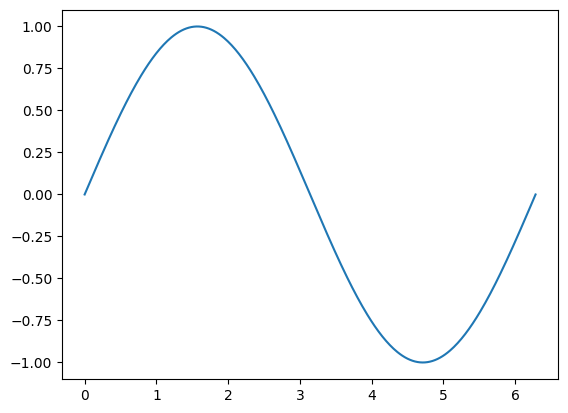

In [44]:
x = torch.linspace(0, 2*np.pi, 360)
y = torch.sin(x)
plt.plot(x,y)
# plt.plot(x.numpy(), y.numpy())
x.shape

In [ ]:
# torch.dot()
# torch.mm()

In [49]:
# derivatives
x = torch.tensor(2, requires_grad=True, dtype=torch.float64)
y = x ** 2
y.backward()
dy_dx = x.grad
dy_dx

tensor(4., dtype=torch.float64)

In [98]:
# Dataset
from torch.utils.data import Dataset

class myData(Dataset):
  def __init__(self, length=10):
    self.x = torch.tensor([1,2,3,4,5,6,7,8,9,19])
    self.y = torch.remainder(self.x, 2)
    self.len = length

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    return sample

  def __len__(self):
    return self.len

In [99]:
dataset = myData()
for i in range(10):
  x, y = dataset[i]
  text = 'Par' if y == 0 else 'Impar'
  print(f"{x.item()}: {text}")

1: Impar
2: Par
3: Impar
4: Par
5: Impar
6: Par
7: Impar
8: Par
9: Impar
19: Impar


In [100]:
# Dataset with Transform
from torch.utils.data import Dataset

class myData(Dataset):
  def __init__(self, length=10, transform=None):
    self.x = torch.tensor([1,2,3,4,5,6,7,8,9,19])
    self.y = torch.remainder(self.x, 2)
    self.len = length
    self.transform = transform

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample

  def __len__(self):
    return self.len

In [101]:
# Transform
class transform_sum(object):
  def __init__(self, addx=0, addy=0):
    self.addx = addx
    self.addy = addy

  def __call__(self, sample):
    x = sample[0]
    y = sample[1]
    x += self.addx
    y = (y + self.addy) % 2
    sample = x, y
    return sample

In [103]:
transform_sum_100 = transform_sum(100, 0)
transform_sum_51 = transform_sum(51, 1)
dataset = myData(transform=transform_sum_100)
for i in range(10):
  x, y = dataset[i]
  text = 'Par' if y == 0 else 'Impar'
  print(f"{x.item()}: {text}")

101: Impar
102: Par
103: Impar
104: Par
105: Impar
106: Par
107: Impar
108: Par
109: Impar
119: Impar


In [104]:
# Transforms Compose
from torchvision import transforms

data_trasform = transforms.Compose([transform_sum_100, transform_sum_51])
dataset = myData(transform=data_trasform)
for i in range(10):
  x, y = dataset[i]
  text = 'Par' if y == 0 else 'Impar'
  print(f"{x.item()}: {text}")

152: Par
153: Impar
154: Par
155: Impar
156: Par
157: Impar
158: Par
159: Impar
160: Par
170: Par


In [105]:
# Dataset for images
# Torch Vision Datasets
from PIL import Image
import pandas as pd
import os
from torch.utils.data import Dataset, DataLoader

In [ ]:
# image = Image.open()
# plt.imshow(image, cmap='gray', vmin=0, vmax=255)
# plt.tilte()
# plt.show()

In [106]:
# Torch Vision Transforms
import torchvision.transforms as transforms
t1 = transforms.CenterCrop(20)
t2 = transforms.ToTensor()
tr = transforms.Compose([t1, t2])
#dataset = Dataset(csv_file = , data_dir = , transform = tr)
dataset[0][0].shape # [1,20,20]

torch.Size([])

In [ ]:
# Torch Vision Datasets
import torchvision.datasets as dsets
dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transfoms.ToTensor())